# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64',
                "TotalCharges": 'float64'
               }) 

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

# Checking for null values

In [8]:
# Checking if it contain null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Percentage of null values
df.isnull().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [10]:
# fill missing values with mean column values
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

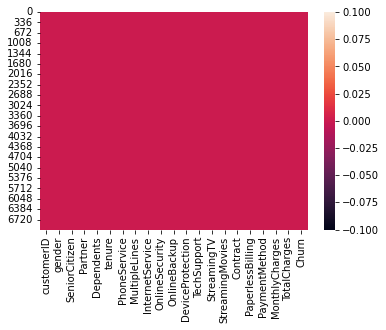

In [41]:
sns.heatmap(df.isnull())

# EDA

In [12]:
# Class Distribution
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

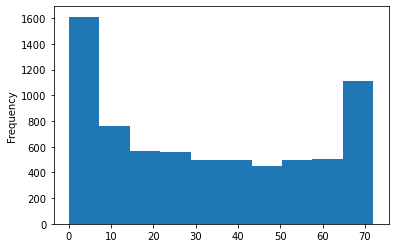

In [13]:
df['tenure'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

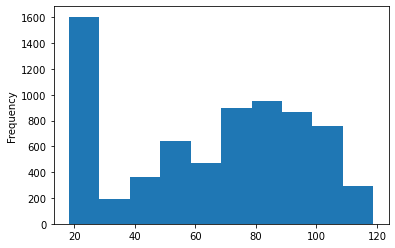

In [14]:
df['MonthlyCharges'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

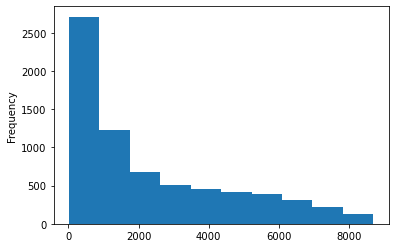

In [15]:
df['TotalCharges'].plot.hist()

In [16]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

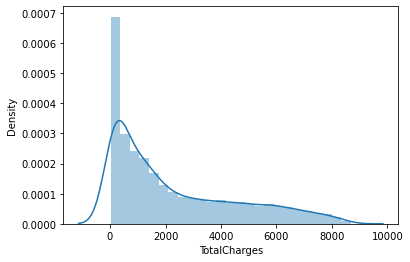

In [17]:
sns.distplot(df["TotalCharges"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

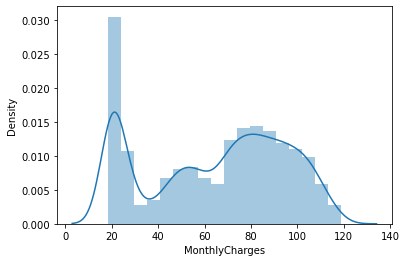

In [18]:
sns.distplot(df["MonthlyCharges"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

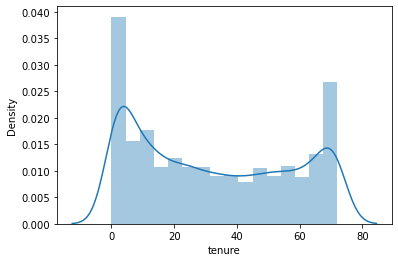

In [19]:
sns.distplot(df["tenure"])

In [20]:
df['TotalCharges']=np.sqrt(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

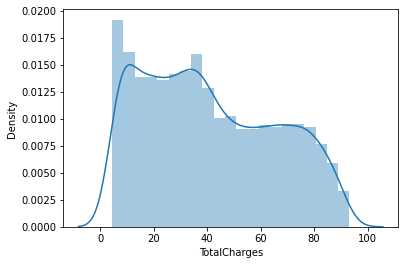

In [21]:
sns.distplot(df["TotalCharges"])

In [22]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.307849
dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

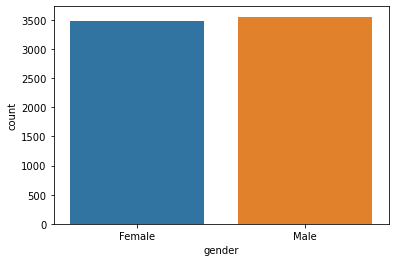

In [23]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

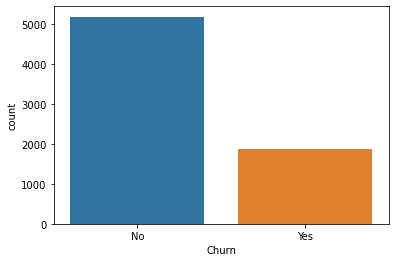

In [24]:
sns.countplot(df['Churn'])

In [25]:

100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Partner', ylabel='count'>

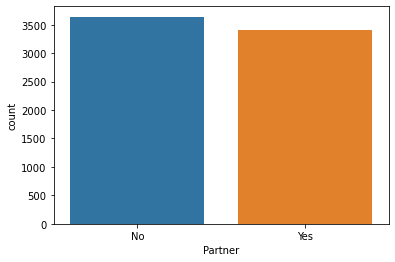

In [26]:
sns.countplot(df['Partner'])

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,5.463515,0
1,3962,1,0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,43.468379,0
2,2564,1,0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,10.399519,1
3,5535,1,0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,42.903963,0
4,6511,0,0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,12.314625,1


# Boxplot for outliers

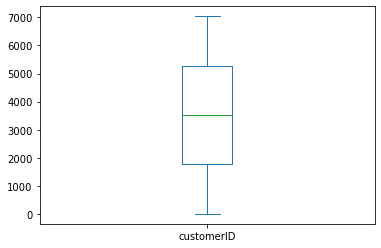

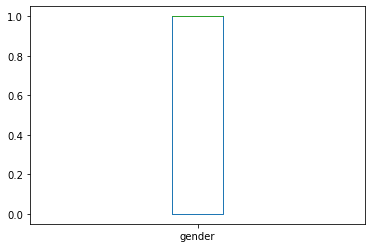

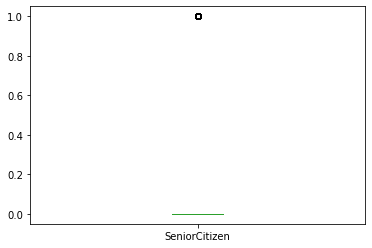

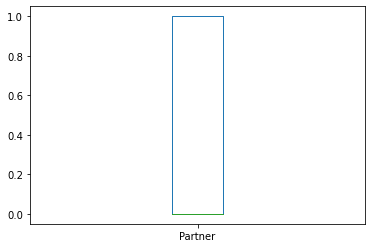

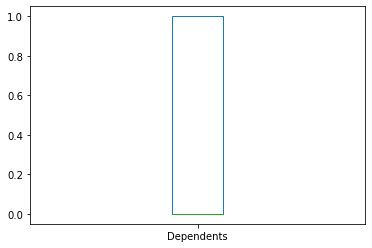

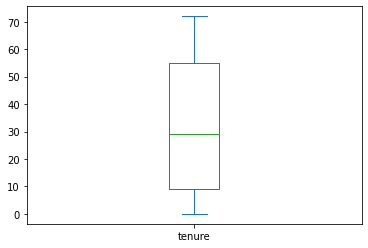

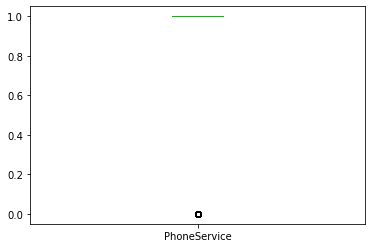

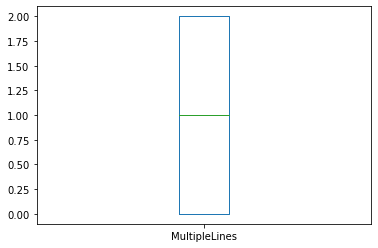

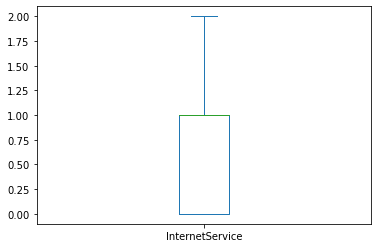

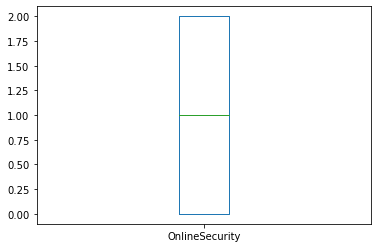

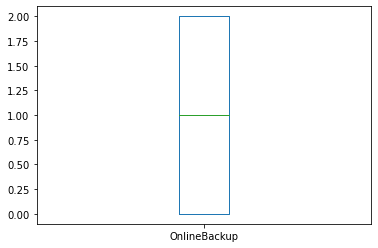

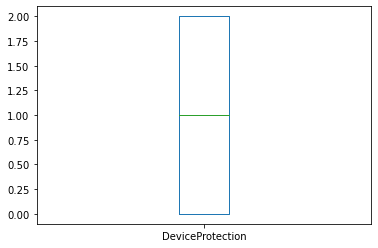

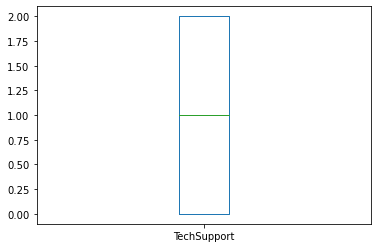

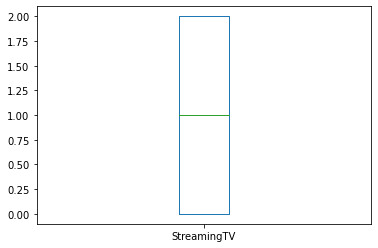

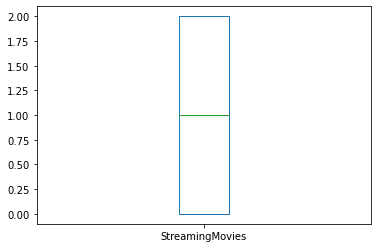

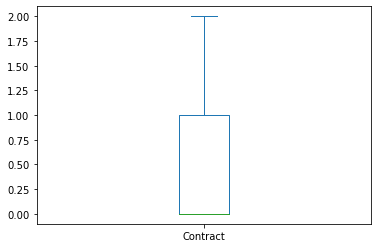

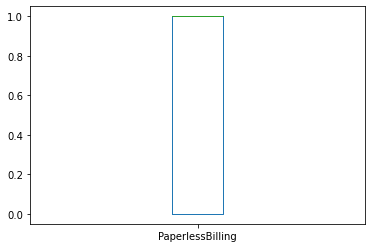

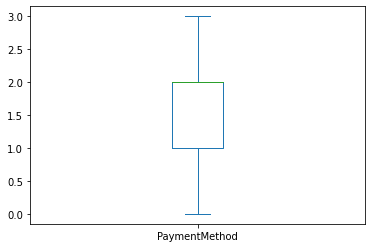

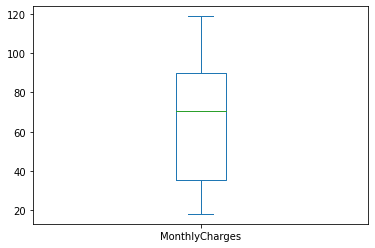

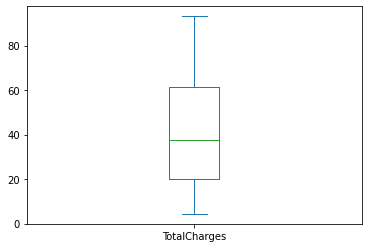

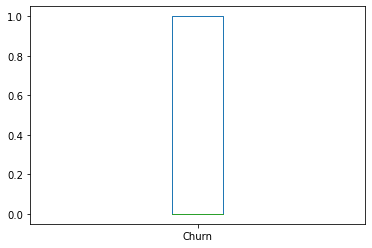

In [30]:
for i in df.describe().columns:
    df[i].plot.box()
    plt.show()

In [31]:
##no outliers

In [43]:
X = df.drop(columns=['Churn'], axis=1)
Y = df['Churn']

# Standard scaling

In [44]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [45]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    73.46 %
1    26.54 %
Name: Churn, dtype: object

# Balance the dataset

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=44)

In [48]:
ros.fit(X, Y)

RandomOverSampler(random_state=44)

In [49]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [50]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Churn, dtype: object

# Importing  ML model

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Train_Test_Split and Best Random state

In [53]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.8105039034776437 random_state 1
accuracy 0.8133427963094393 random_state 2
accuracy 0.8133427963094393 random_state 3
accuracy 0.7842441447835344 random_state 4
accuracy 0.794889992902768 random_state 5
accuracy 0.8076650106458482 random_state 6
accuracy 0.8062455642299503 random_state 7
accuracy 0.7863733144073811 random_state 8
accuracy 0.7984386089425124 random_state 9
accuracy 0.8133427963094393 random_state 10
accuracy 0.8055358410220014 random_state 11
accuracy 0.7977288857345636 random_state 12
accuracy 0.8112136266855926 random_state 13
accuracy 0.8246983676366217 random_state 14
accuracy 0.7998580553584103 random_state 15
accuracy 0.8119233498935415 random_state 16
accuracy 0.7998580553584103 random_state 17
accuracy 0.8268275372604684 random_state 18
accuracy 0.808374733853797 random_state 19
accuracy 0.8225691980127751 random_state 20
accuracy 0.7927608232789212 random_state 21
accuracy 0.7835344215755855 random_state 22
accuracy 0.808374733853797 random_state 23


In [54]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8310858765081618  on Random_state 35


In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=24)

In [56]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

--------------Result of LogisticRegression---------------------
Accuracy 82.58400378608613
[[1454  131]
 [ 237  291]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1585
           1       0.69      0.55      0.61       528

    accuracy                           0.83      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.82      0.83      0.82      2113



In [57]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


--------------Result of DecisionTreeClassifier---------------------
Accuracy 75.01183151916706
[[1297  288]
 [ 240  288]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1585
           1       0.50      0.55      0.52       528

    accuracy                           0.75      2113
   macro avg       0.67      0.68      0.68      2113
weighted avg       0.76      0.75      0.75      2113

--------------Result of RandomForestClassifier---------------------
Accuracy 81.40085186938003
[[1455  130]
 [ 263  265]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1585
           1       0.67      0.50      0.57       528

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113

--------------Result of SVC---------------------
Accuracy 81.73213440605774
[[1461  124]
 [ 262  266]]

# Cross validation

In [58]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.8040621572359508
Cross Validation score of Decision Tree Classifier :  0.7300867193044713
Cross Validation score of Random Forest Classifier :  0.7911422712755662
Cross Validation score of SVC :  0.7986683616684946
Cross Validation score of KNeighbors classifier :  0.7591942423704755
Cross Validation score of GaussianNB :  0.7591942423704755


# Hyperparameter Tunning with GridSearchCV

In [59]:
RandomForestClassifier()

RandomForestClassifier()

In [60]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[100,200,300,400,500],
            'criterion':['gini','entropy']}

In [61]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto'}

In [62]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [63]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='auto')

In [64]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8106956933270232

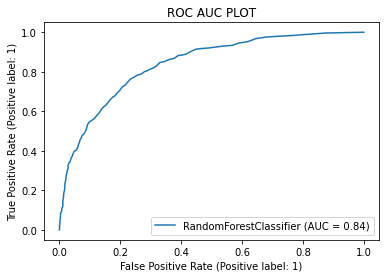

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# Conclusion

Logistic regression, RandomForest Classifier, SVC, KNN and GausianNB gives the best result for this dataset.

In [66]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"Telecom_customer_churn.pkl")

['Telecom_customer_churn.pkl']